In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.figure_factory as ff

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

* The dataset contains 1338  rows and 7 features 
* The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 categorical features (sex, smoker and region)
* Target variable : expenses
* Objective : Predicting the expenses based on the given features of a individual.
* For smoker: if yes: 1 and no: 0
* For sex: if female: 1 and male: 0

In [6]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

## Univariate


In [7]:
px.histogram(df, x='age')

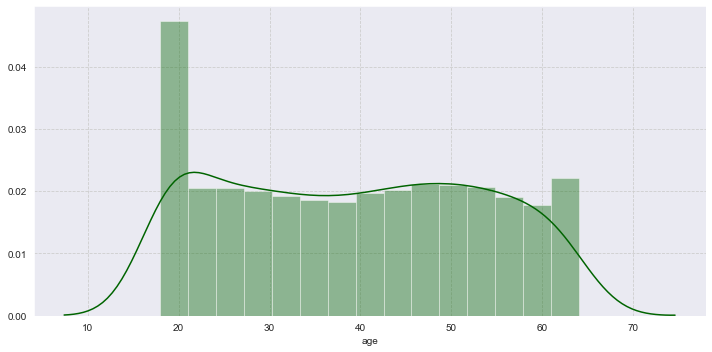

In [8]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['age'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

*  Distribution for age looks almost uniform, exept for ages 18 and 19.


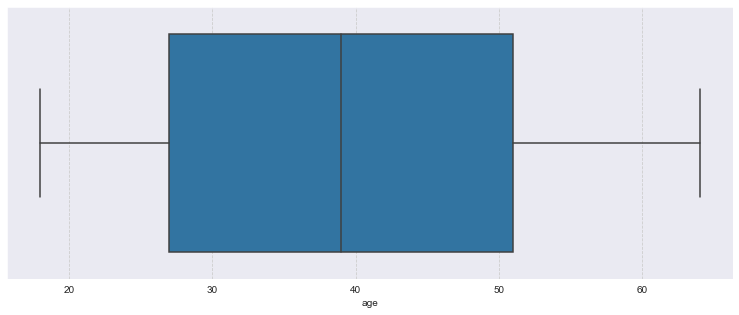

In [9]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df.age)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

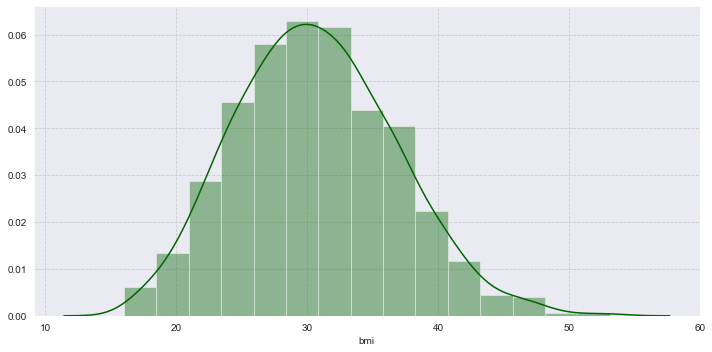

In [11]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['bmi'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
px.histogram(df, x='bmi')

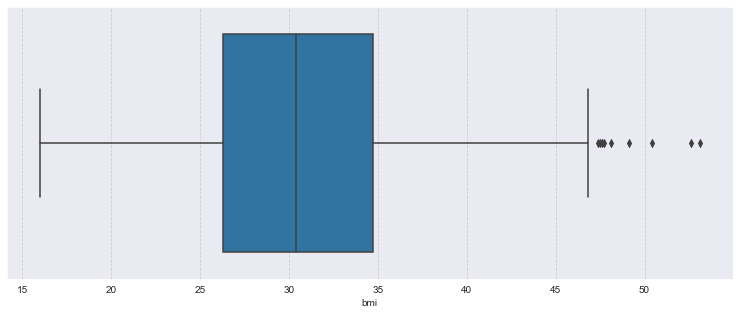

In [13]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df.bmi)

* Boxplot does show we have some outliers.


In [14]:
px.histogram(df, x='expenses')

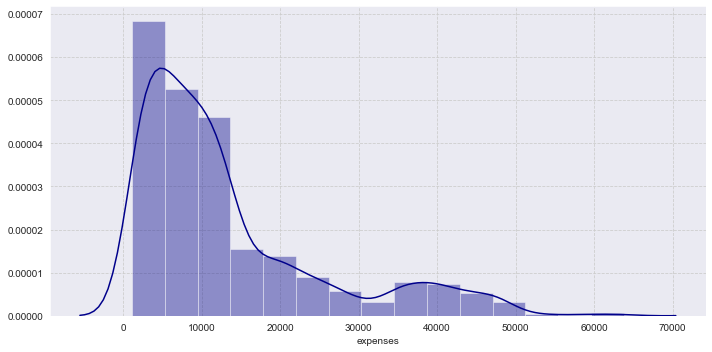

In [15]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['expenses'],bins=15,color='darkblue')
plt.tight_layout()
plt.grid(True)
plt.show()

* Distribution of expenses is right skewed.



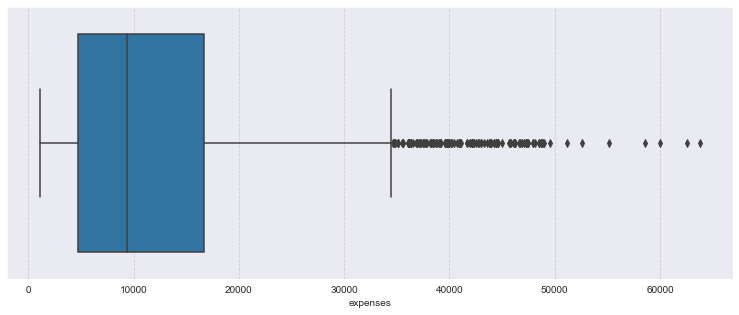

In [16]:
plt.figure(figsize=(13,5))
sns.boxplot(x=df.expenses)

In [17]:
px.histogram(df, x='expenses', color='smoker')

* Expenses column  have a positive skew
*  Most people no smoker have expenses under 17k
* Smokers have insurance of high expense


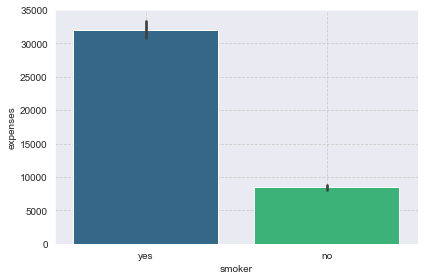

In [42]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

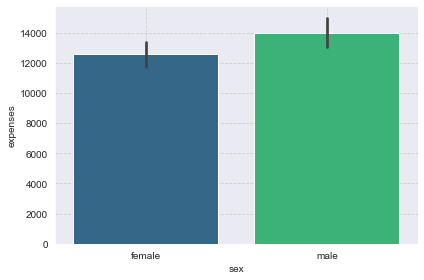

In [39]:
sns.barplot(x='sex',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

* Male have a bit higher expense  compared to female.

In [18]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

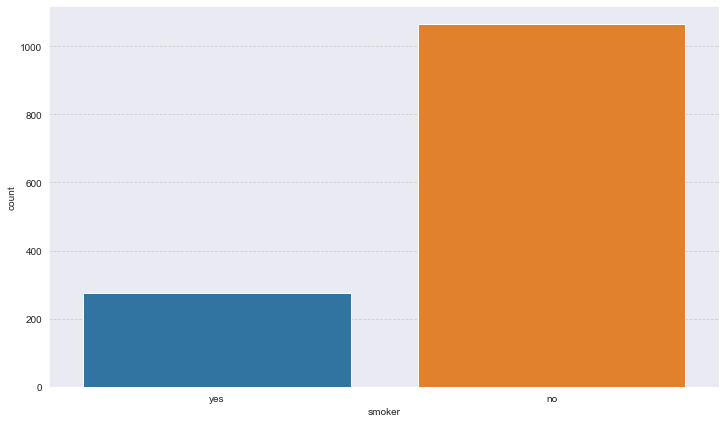

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x=df.smoker)

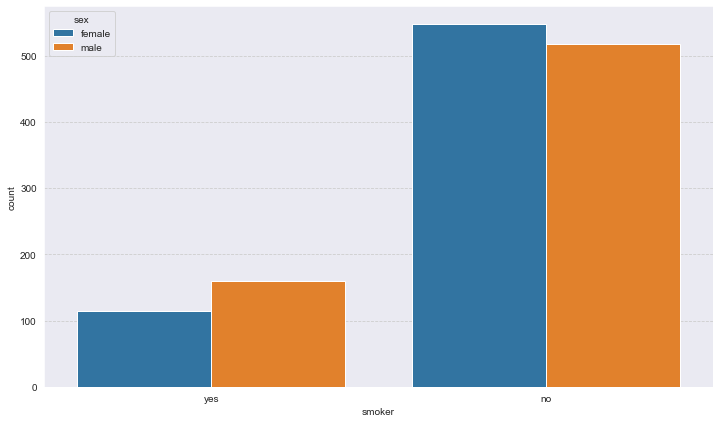

In [20]:
# Visualize by smoker by sex
plt.figure(figsize=(12,7))
sns.countplot(x=df.smoker, hue=df.sex)

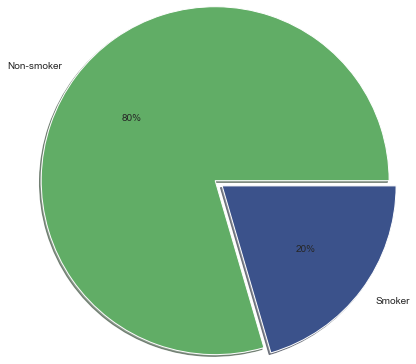

In [21]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of smoker
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

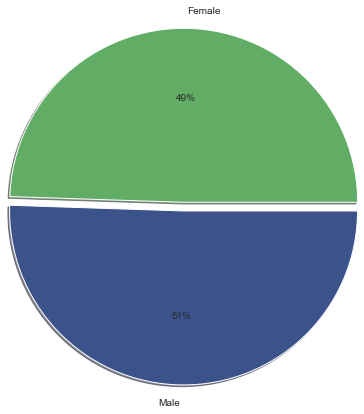

In [22]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['sex'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

*  Most people do not smoke or report that they do not smoke.
* Men seem most likely to report that they smoke.

#### relationship between variables.

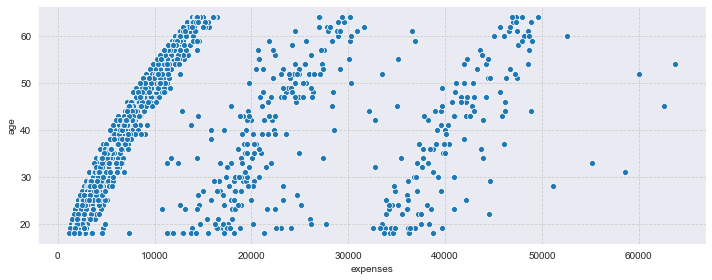

In [23]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

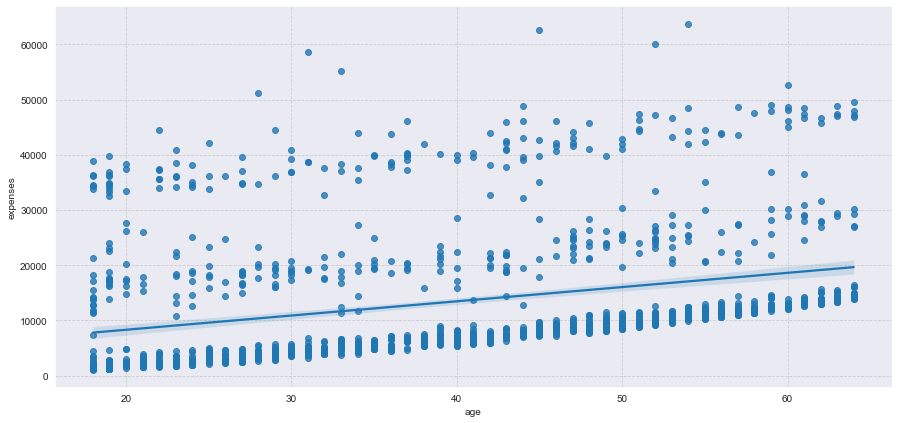

In [24]:
# Explore relationship between AGE and CHARGES
plt.figure(figsize=(15,7))
sns.regplot(x=df.age, y=df.expenses)

* In this graph you can see that younger applicants have lower expenses and older applicants have higher expenses.

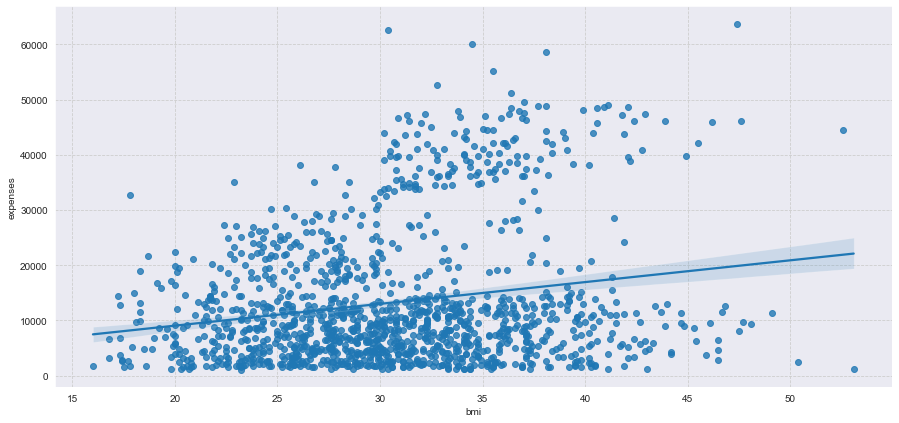

In [25]:
# Explore relationship between BMI and CHARGES
plt.figure(figsize=(15,7))
sns.regplot(x=df.bmi, y=df.expenses)

* There is a slight positive relation between BMI and expense

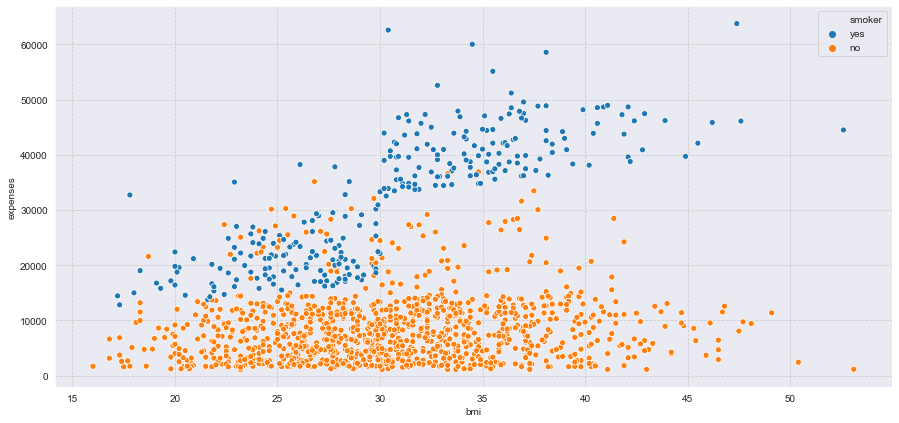

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.bmi, y=df.expenses,hue=df.smoker )

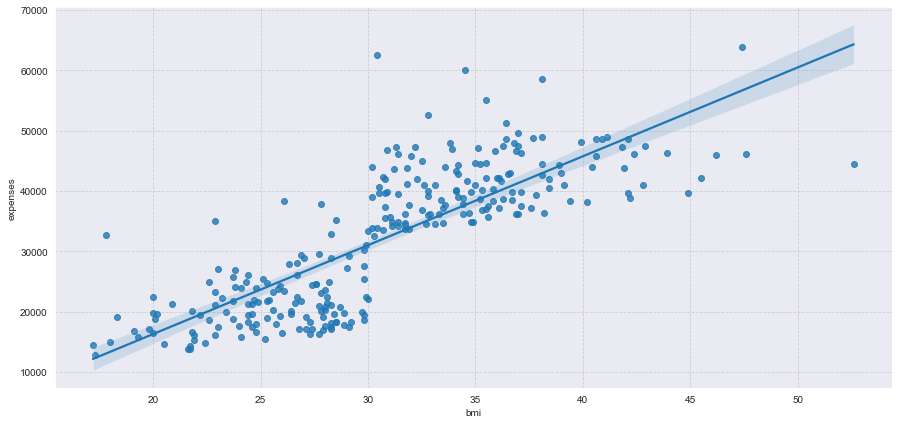

In [27]:
# Smokers BMI vs Expenses
plt.figure(figsize=(15,7))
smoker_df = df[df['smoker'] == 'yes']
sns.regplot(x=smoker_df.bmi, y=smoker_df.expenses)

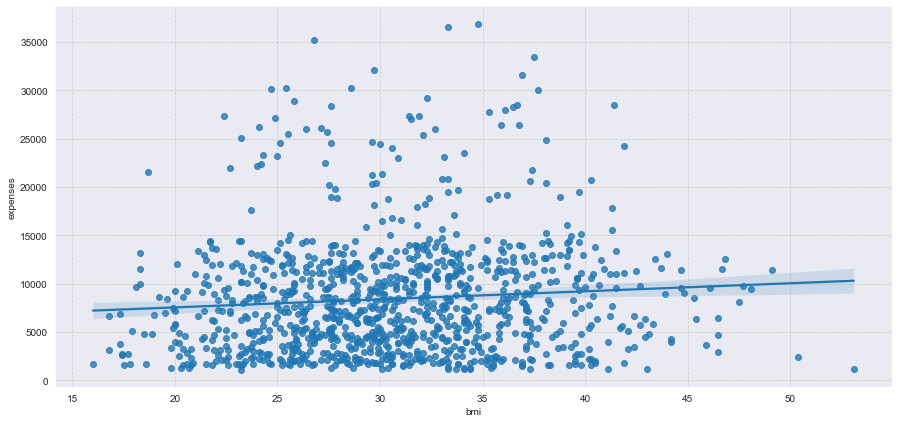

In [28]:
# Non-Smokers BMI vs Expenses
plt.figure(figsize=(15,7))
smoker_df = df[df['smoker'] == 'no']
sns.regplot(x=smoker_df.bmi, y=smoker_df.expenses)

* Expenses do not seem to increase with bmi of non smokers.
* Smokers expenses increase with bmi.


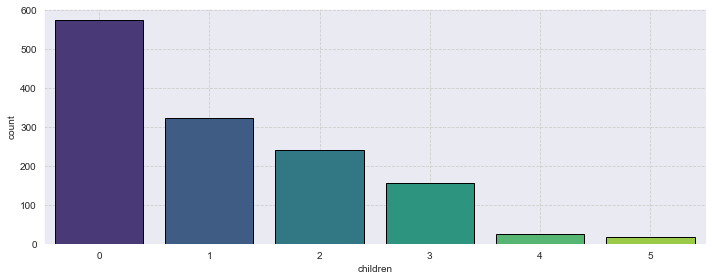

In [29]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['children'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

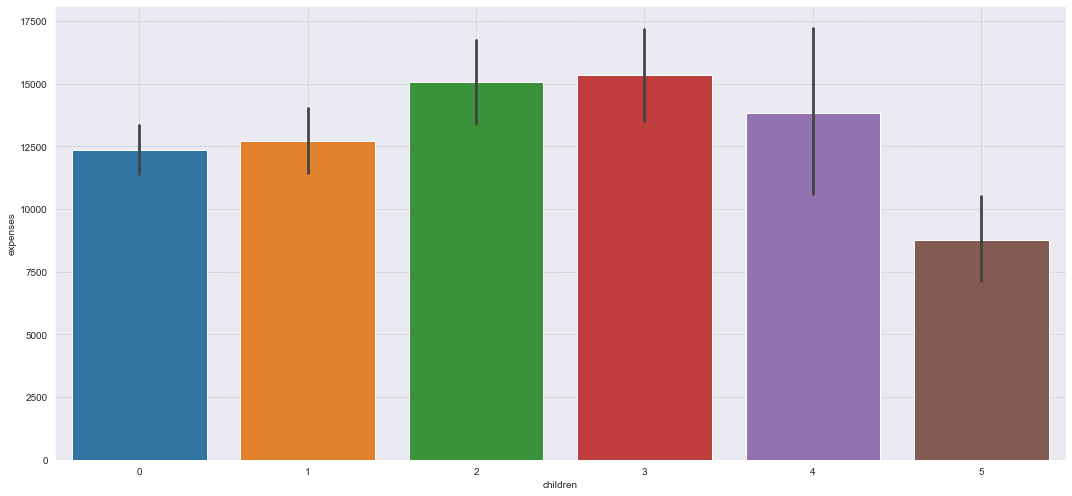

In [41]:
# Explore other expenses relationships.
plt.figure(figsize=(15,7))
sns.barplot(x=df.children, y=df.expenses)

plt.tight_layout()
plt.grid(True)
#plt.show()

* Applicant with 2 or 3 children have higher expenses



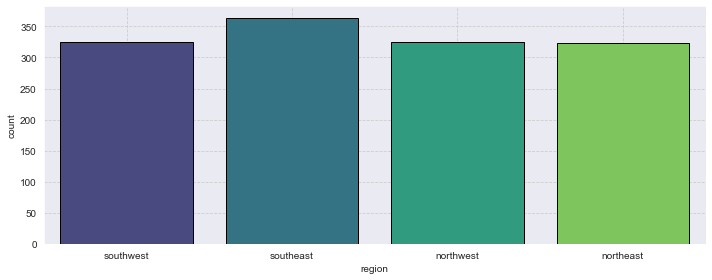

In [31]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['region'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

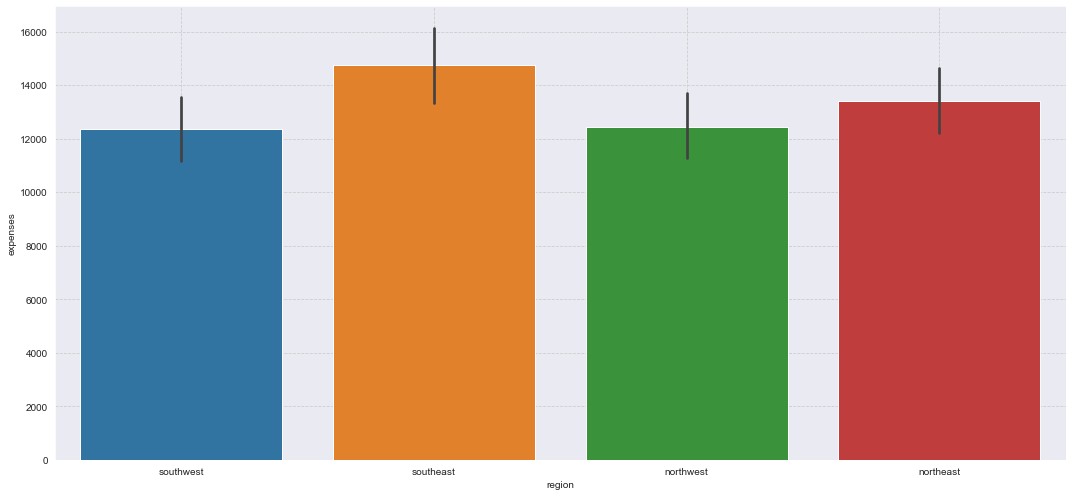

In [45]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.region, y=df.expenses)
plt.tight_layout()
plt.grid(True)

* People in the southeast region have highest expenses, and people in northwest have lowest.

###### Find the correlation coefficient of our columns.

In [33]:
df.expenses.corr(df.age)

0.29900819228508274

In [34]:
df.expenses.corr(df.bmi)

0.19857625501893203

In [35]:
df.expenses.corr(df.children)

0.06799823000532818

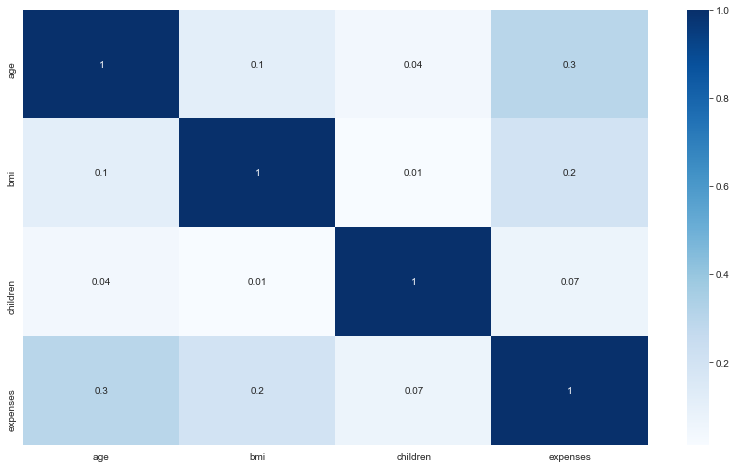

In [36]:
# visualize correlation using a heatmap
plt.figure(figsize=(14,8))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.1g', cmap='Blues')

 * We do not  to have strong correlation between variables.

In [37]:
# See relationship between expenses and smokers
# First convert datatype to numerical
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [38]:
df.expenses.corr(smoker_numeric)

0.7872514298985526